In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merge = pd.read_csv("Latest_all_in_one.csv")
merge.head()

,RID,Sleep_Apnea,Restless_Legs,Insomnia,Sleep_Disturbance_Other,RightEntorhinal,RightTemporalPole,RightParahippocampal,RightInferiorTemporal,RightMiddleTemporal,...,Adjusted_Age,MH,NPIK,NPIKSEV,BMI,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
0,3,0,0,0,0,791.846918,1078.037276,1512.146246,6716.630454,8350.166431,...,81.300000,1,0.0,0.0,10.927769,-1.021,-1.144,-0.880,-1.368,-1.062
1,3,0,0,0,0,958.133790,938.695742,1614.977833,6975.019609,7541.152761,...,81.798289,1,0.0,0.0,10.927769,-1.187,-0.674,-1.221,-1.638,-0.670
2,3,0,0,0,0,676.398197,1094.889167,1440.387527,6116.780815,7896.178469,...,82.299316,1,0.0,0.0,10.927769,-0.914,-0.969,-0.548,-1.837,-1.034
3,3,0,0,0,0,442.103700,1037.524095,1379.850263,6111.576649,7557.134067,...,83.298630,1,0.0,0.0,10.927769,-1.369,-1.511,0.739,-1.700,-1.605
4,5,0,0,0,0,2376.161479,1881.167048,2169.129587,9288.203483,10896.464856,...,73.700000,0,0.0,0.0,12.273373,0.743,0.165,0.739,0.259,-0.152


In [3]:
merged_file = merge.copy()

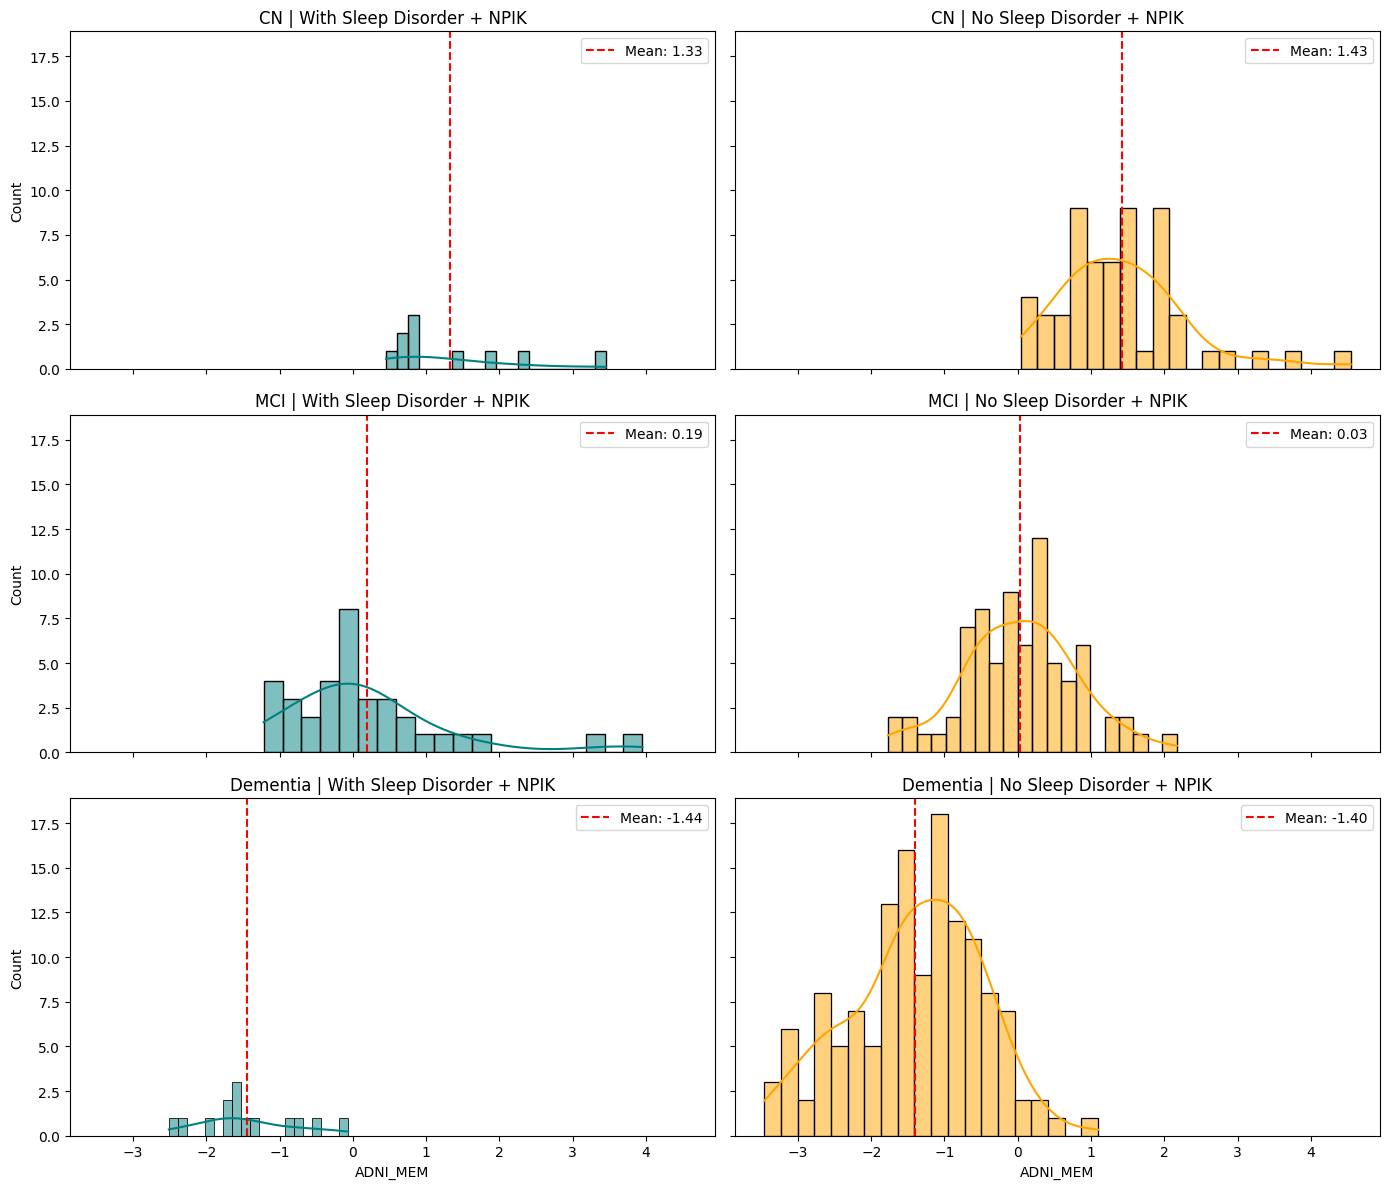

In [4]:
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0

diagnoses = ['CN', 'MCI', 'Dementia']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(
    14, 12), sharex=True, sharey=True)

for i, diag in enumerate(diagnoses):
    df_diag = merged_file[merged_file['DX'] == diag]

    with_sleep = df_diag[(df_diag['NPIK'] == 1) &
                         (df_diag['Any_Sleep_Disorder'])]
    without_sleep = df_diag[(df_diag['NPIK'] == 1) &
                            (~df_diag['Any_Sleep_Disorder'])]

    ax_left = axes[i, 0]
    sns.histplot(with_sleep['ADNI_MEM'], kde=True,
                 bins=20, color='teal', ax=ax_left)
    ax_left.axvline(with_sleep['ADNI_MEM'].mean(), color='red', linestyle='--',
                    label=f"Mean: {with_sleep['ADNI_MEM'].mean():.2f}")
    ax_left.set_title(f'{diag} | With Sleep Disorder + NPIK')
    ax_left.set_ylabel('Count')
    ax_left.set_xlabel('ADNI_MEM')
    ax_left.legend()

    ax_right = axes[i, 1]
    sns.histplot(without_sleep['ADNI_MEM'], kde=True,
                 bins=20, color='orange', ax=ax_right)
    ax_right.axvline(without_sleep['ADNI_MEM'].mean(), color='red', linestyle='--',
                     label=f"Mean: {without_sleep['ADNI_MEM'].mean():.2f}")
    ax_right.set_title(f'{diag} | No Sleep Disorder + NPIK')
    ax_right.set_xlabel('ADNI_MEM')
    ax_right.legend()

plt.tight_layout()
plt.show()

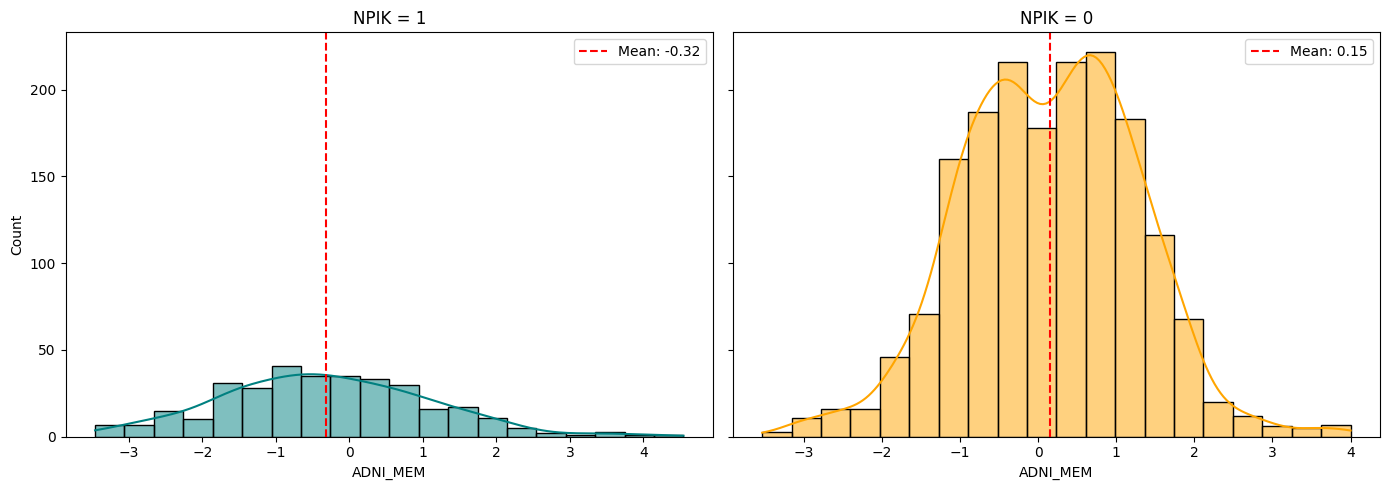

In [5]:
npik_1 = merged_file[merged_file['NPIK'] == 1]
npik_0 = merged_file[merged_file['NPIK'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(npik_1['ADNI_MEM'], kde=True, bins=20, color='teal', ax=axes[0])
axes[0].axvline(npik_1['ADNI_MEM'].mean(), color='red', linestyle='--',
                label=f"Mean: {npik_1['ADNI_MEM'].mean():.2f}")
axes[0].set_title('NPIK = 1')
axes[0].set_xlabel('ADNI_MEM')
axes[0].set_ylabel('Count')
axes[0].legend()

sns.histplot(npik_0['ADNI_MEM'], kde=True, bins=20, color='orange', ax=axes[1])
axes[1].axvline(npik_0['ADNI_MEM'].mean(), color='red', linestyle='--',
                label=f"Mean: {npik_0['ADNI_MEM'].mean():.2f}")
axes[1].set_title('NPIK = 0')
axes[1].set_xlabel('ADNI_MEM')
axes[1].legend()
plt.tight_layout()
plt.show()

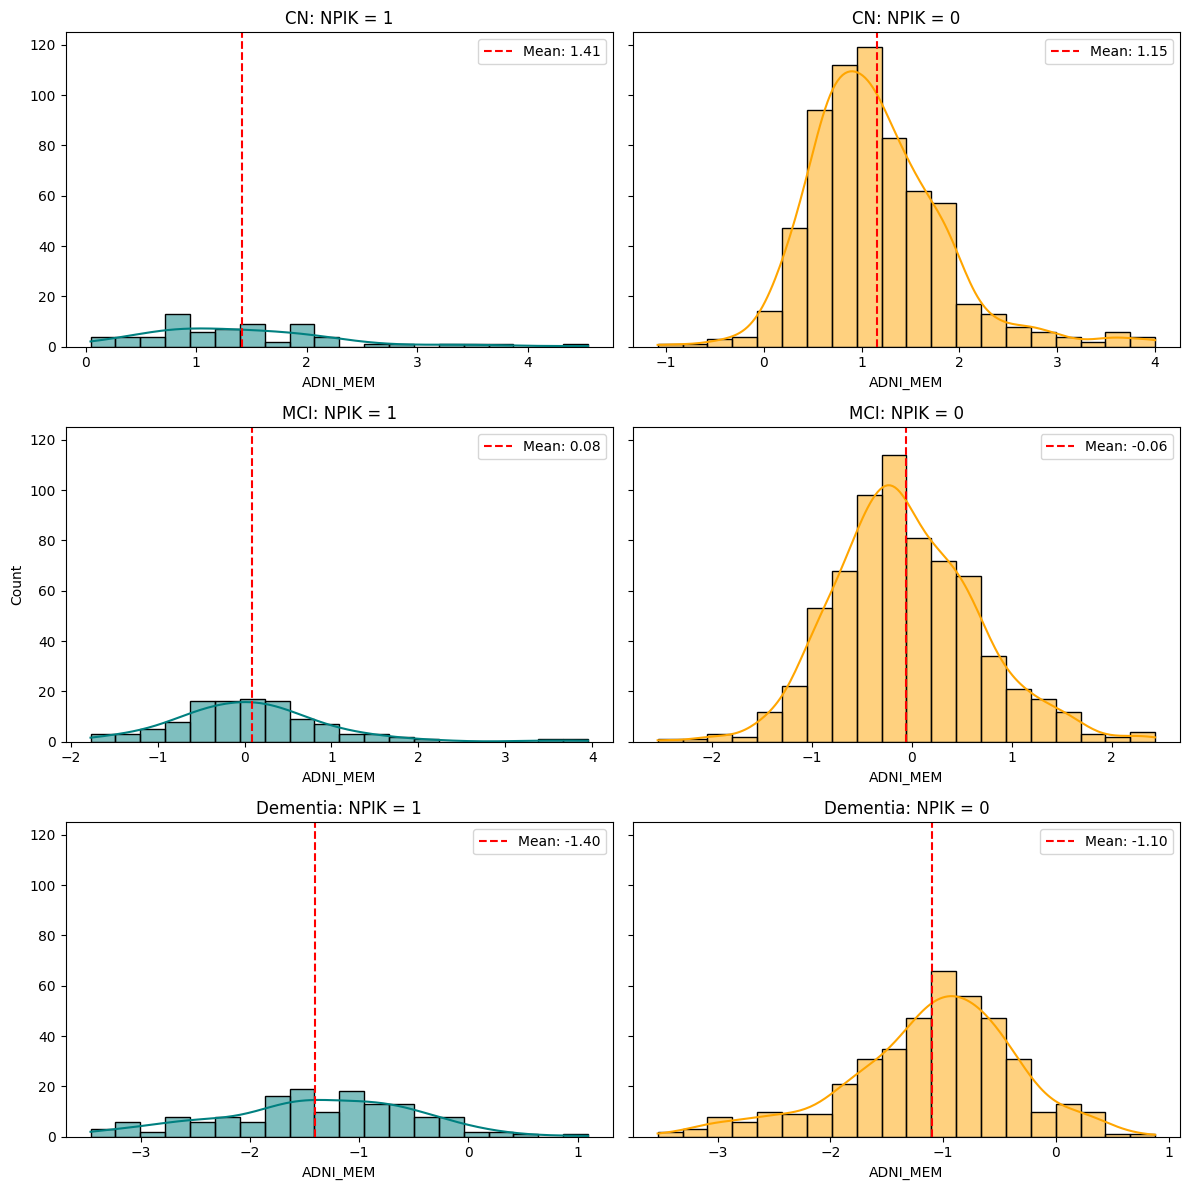

In [6]:
diagnoses = ['CN', 'MCI', 'Dementia']
fig, axes = plt.subplots(len(diagnoses), 2, figsize=(12, 12), sharey=True)

for i, diag in enumerate(diagnoses):
    subset = merged_file[merged_file['DX'] == diag]

    npik_1 = subset[subset['NPIK'] == 1]
    npik_0 = subset[subset['NPIK'] == 0]

    sns.histplot(npik_1['ADNI_MEM'], kde=True,
                 bins=20, color='teal', ax=axes[i, 0])
    axes[i, 0].axvline(npik_1['ADNI_MEM'].mean(), color='red', linestyle='--',
                       label=f"Mean: {npik_1['ADNI_MEM'].mean():.2f}")
    axes[i, 0].set_title(f'{diag}: NPIK = 1')
    axes[i, 0].set_xlabel('ADNI_MEM')
    axes[i, 0].set_ylabel('Count' if i == 1 else '')
    axes[i, 0].legend()

    sns.histplot(npik_0['ADNI_MEM'], kde=True, bins=20,
                 color='orange', ax=axes[i, 1])
    axes[i, 1].axvline(npik_0['ADNI_MEM'].mean(), color='red', linestyle='--',
                       label=f"Mean: {npik_0['ADNI_MEM'].mean():.2f}")
    axes[i, 1].set_title(f'{diag}: NPIK = 0')
    axes[i, 1].set_xlabel('ADNI_MEM')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

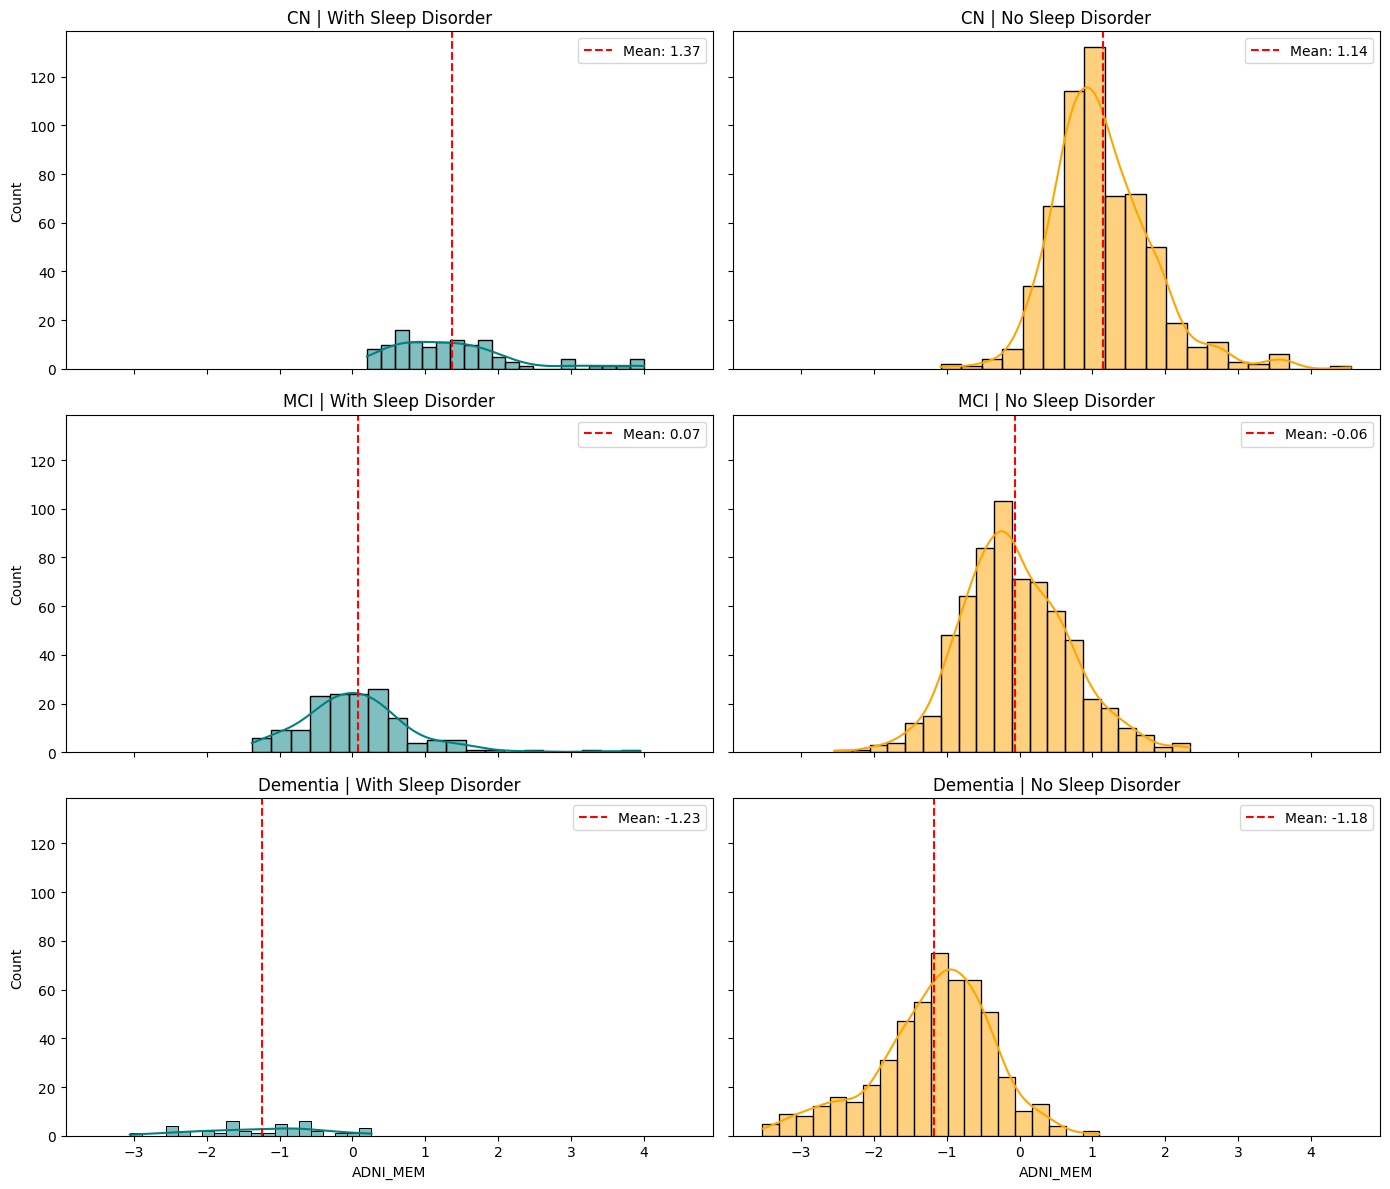

In [7]:
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0

diagnoses = ['CN', 'MCI', 'Dementia']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(
    14, 12), sharex=True, sharey=True)

for i, diag in enumerate(diagnoses):
    df_diag = merged_file[merged_file['DX'] == diag]

    with_sleep = df_diag[(df_diag['Any_Sleep_Disorder'])]
    without_sleep = df_diag[(~df_diag['Any_Sleep_Disorder'])]

    ax_left = axes[i, 0]
    sns.histplot(with_sleep['ADNI_MEM'], kde=True,
                 bins=20, color='teal', ax=ax_left)
    ax_left.axvline(with_sleep['ADNI_MEM'].mean(), color='red', linestyle='--',
                    label=f"Mean: {with_sleep['ADNI_MEM'].mean():.2f}")
    ax_left.set_title(f'{diag} | With Sleep Disorder')
    ax_left.set_ylabel('Count')
    ax_left.set_xlabel('ADNI_MEM')
    ax_left.legend()

    ax_right = axes[i, 1]
    sns.histplot(without_sleep['ADNI_MEM'], kde=True,
                 bins=20, color='orange', ax=ax_right)
    ax_right.axvline(without_sleep['ADNI_MEM'].mean(), color='red', linestyle='--',
                     label=f"Mean: {without_sleep['ADNI_MEM'].mean():.2f}")
    ax_right.set_title(f'{diag} | No Sleep Disorder')
    ax_right.set_xlabel('ADNI_MEM')
    ax_right.legend()

plt.tight_layout()
plt.show()

In [8]:
cognitive_outcomes = ['ADNI_MEM', 'ADNI_EF', 'ADNI_EF2', 'ADNI_VS', 'ADNI_LAN']
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']
merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0
diagnoses = ['CN', 'MCI', 'Dementia']

all_summaries = []

for outcome in cognitive_outcomes:
    summary_data = []

    for diag in diagnoses:
        df_diag = merged_file[merged_file['DX'] == diag]

        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'With Sleep + NPIK=1',
            'Mean': round(df_diag[(df_diag['NPIK'] == 1) & (df_diag['Any_Sleep_Disorder'])][outcome].mean(), 2)
        })
        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'No Sleep + NPIK=1',
            'Mean': round(df_diag[(df_diag['NPIK'] == 1) & (~df_diag['Any_Sleep_Disorder'])][outcome].mean(), 2)
        })
        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'NPIK=1',
            'Mean': round(df_diag[df_diag['NPIK'] == 1][outcome].mean(), 2)
        })
        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'NPIK=0',
            'Mean': round(df_diag[df_diag['NPIK'] == 0][outcome].mean(), 2)
        })
        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'With Sleep',
            'Mean': round(df_diag[df_diag['Any_Sleep_Disorder']][outcome].mean(), 2)
        })
        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'No Sleep',
            'Mean': round(df_diag[~df_diag['Any_Sleep_Disorder']][outcome].mean(), 2)
        })

    df_outcome = pd.DataFrame(summary_data)
    df_outcome_pivot = df_outcome.pivot(
        index='Diagnosis', columns='Condition', values='Mean')
    df_outcome_pivot['Cognitive_Outcome'] = outcome
    all_summaries.append(df_outcome_pivot)

final_summary = pd.concat(all_summaries)
final_summary = final_summary.set_index('Cognitive_Outcome', append=True)
final_summary = final_summary.reorder_levels(
    ['Cognitive_Outcome', 'Diagnosis'])

final_summary = final_summary.sort_index()

final_summary

Condition                    NPIK=0  NPIK=1  No Sleep  No Sleep + NPIK=1  \
Cognitive_Outcome Diagnosis                                                
ADNI_EF           CN           0.88    1.03      0.85               0.96   
                  Dementia    -1.01   -1.24     -1.10              -1.27   
                  MCI          0.04    0.21      0.02               0.14   
ADNI_EF2          CN           0.62    0.73      0.60               0.66   
                  Dementia    -1.12   -1.32     -1.20              -1.36   
                  MCI         -0.10    0.04     -0.12              -0.02   
ADNI_LAN          CN           0.87    1.07      0.82               1.06   
                  Dementia    -0.86   -1.29     -0.99              -1.31   
                  MCI         -0.02    0.06     -0.04               0.02   
ADNI_MEM          CN           1.15    1.41      1.14               1.43   
                  Dementia    -1.10   -1.40     -1.18              -1.40   
                  MCI         -0.06    0.08     -0.06               0.03   
ADNI_VS           CN           0.28    0.44      0.29               0.43   
                  Dementia    -0.61   -0.83     -0.68              -0.84   
                  MCI         -0.08   -0.08     -0.11              -0.21   

Condition                    With Sleep  With Sleep + NPIK=1  
Cognitive_Outcome Diagnosis                                   
ADNI_EF           CN               1.12                 1.39  
                  Dementia        -0.71                -0.92  
                  MCI              0.23                 0.34  
ADNI_EF2          CN               0.79                 1.12  
                  Dementia        -0.76                -0.99  
                  MCI              0.05                 0.17  
ADNI_LAN          CN               1.20                 1.16  
                  Dementia        -0.74                -1.10  
                  MCI              0.12                 0.14  
ADNI_MEM          CN               1.37                 1.33  
                  Dementia        -1.23                -1.44  
                  MCI              0.07                 0.19  
ADNI_VS           CN               0.32                 0.49  
                  Dementia        -0.55                -0.76  
                  MCI              0.06                 0.21

In [9]:
final_summary = final_summary[['NPIK=0', 'No Sleep', 'NPIK=1', 'With Sleep', 'No Sleep + NPIK=1', 'With Sleep + NPIK=1']]
final_summary

Condition                    NPIK=0  No Sleep  NPIK=1  With Sleep  \
Cognitive_Outcome Diagnosis                                         
ADNI_EF           CN           0.88      0.85    1.03        1.12   
                  Dementia    -1.01     -1.10   -1.24       -0.71   
                  MCI          0.04      0.02    0.21        0.23   
ADNI_EF2          CN           0.62      0.60    0.73        0.79   
                  Dementia    -1.12     -1.20   -1.32       -0.76   
                  MCI         -0.10     -0.12    0.04        0.05   
ADNI_LAN          CN           0.87      0.82    1.07        1.20   
                  Dementia    -0.86     -0.99   -1.29       -0.74   
                  MCI         -0.02     -0.04    0.06        0.12   
ADNI_MEM          CN           1.15      1.14    1.41        1.37   
                  Dementia    -1.10     -1.18   -1.40       -1.23   
                  MCI         -0.06     -0.06    0.08        0.07   
ADNI_VS           CN           0.28      0.29    0.44        0.32   
                  Dementia    -0.61     -0.68   -0.83       -0.55   
                  MCI         -0.08     -0.11   -0.08        0.06   

Condition                    No Sleep + NPIK=1  With Sleep + NPIK=1  
Cognitive_Outcome Diagnosis                                          
ADNI_EF           CN                      0.96                 1.39  
                  Dementia               -1.27                -0.92  
                  MCI                     0.14                 0.34  
ADNI_EF2          CN                      0.66                 1.12  
                  Dementia               -1.36                -0.99  
                  MCI                    -0.02                 0.17  
ADNI_LAN          CN                      1.06                 1.16  
                  Dementia               -1.31                -1.10  
                  MCI                     0.02                 0.14  
ADNI_MEM          CN                      1.43                 1.33  
                  Dementia               -1.40                -1.44  
                  MCI                     0.03                 0.19  
ADNI_VS           CN                      0.43                 0.49  
                  Dementia               -0.84                -0.76  
                  MCI                    -0.21                 0.21

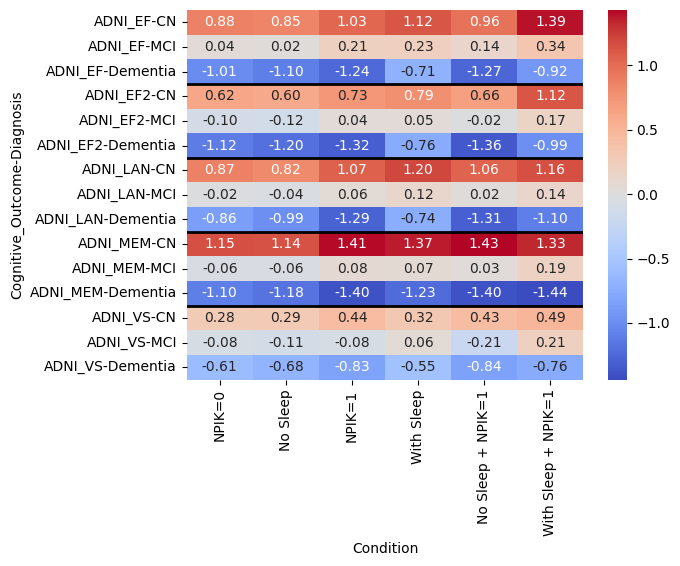

In [13]:
final_summary = final_summary.reindex(
    ['CN', 'MCI', 'Dementia'], level='Diagnosis')

ax = sns.heatmap(final_summary, annot=True, fmt='.2f', cmap='coolwarm')

group_sizes = final_summary.index.get_level_values('Cognitive_Outcome').value_counts(sort=False)
pos = 0
for size in group_sizes[:-1]:
    pos += size
    ax.axhline(pos, color='black', linewidth=2)

plt.show()

In [15]:
cognitive_outcomes = ['ADNI_MEM', 'ADNI_EF', 'ADNI_EF2', 'ADNI_VS', 'ADNI_LAN']
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']
merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0
diagnoses = ['CN', 'MCI', 'Dementia']
severity_map = {1: 'Mild', 2: 'Moderate', 3: 'Severe'}
all_summaries = []
for outcome in cognitive_outcomes:
    summary_data = []
    for diag in diagnoses:
        df_diag = merged_file[merged_file['DX'] == diag]

        for sev_value, sev_label in severity_map.items():
            subset = df_diag[df_diag['NPIKSEV'] == sev_value]
            summary_data.append({
                'Diagnosis': diag,
                'Condition': f'NPIKSEV={sev_label}',
                'Mean': round(subset[outcome].mean(), 2)
            })

            subset = df_diag[(df_diag['NPIKSEV'] == sev_value)
                             & (df_diag['Any_Sleep_Disorder'])]
            summary_data.append({
                'Diagnosis': diag,
                'Condition': f'{sev_label} + With Sleep',
                'Mean': round(subset[outcome].mean(), 2)
            })

            subset = df_diag[(df_diag['NPIKSEV'] == sev_value)
                             & (~df_diag['Any_Sleep_Disorder'])]
            summary_data.append({
                'Diagnosis': diag,
                'Condition': f'{sev_label} + No Sleep',
                'Mean': round(subset[outcome].mean(), 2)
            })
        subset = df_diag[df_diag['NPIKSEV'] == 0]
        summary_data.append({
            'Diagnosis': diag,
            'Condition': 'NPIKSEV=0',
            'Mean': round(subset[outcome].mean(), 2)
        })

    df_outcome = pd.DataFrame(summary_data)
    df_outcome_pivot = df_outcome.pivot(
        index='Diagnosis', columns='Condition', values='Mean')
    df_outcome_pivot['Cognitive_Outcome'] = outcome
    all_summaries.append(df_outcome_pivot)

final_summary = pd.concat(all_summaries)
final_summary = final_summary.set_index('Cognitive_Outcome', append=True)
final_summary = final_summary.reorder_levels(
    ['Cognitive_Outcome', 'Diagnosis'])
final_summary = final_summary.sort_index()
final_summary = final_summary.reindex(
    ['CN', 'MCI', 'Dementia'], level='Diagnosis')
final_summary

Condition                    Mild + No Sleep  Mild + With Sleep  \
Cognitive_Outcome Diagnosis                                       
ADNI_EF           CN                    1.00               1.31   
                  MCI                   0.15               0.26   
                  Dementia             -1.24              -0.65   
ADNI_EF2          CN                    0.69               1.02   
                  MCI                  -0.02               0.13   
                  Dementia             -1.35              -0.76   
ADNI_LAN          CN                    1.08               1.32   
                  MCI                   0.02              -0.02   
                  Dementia             -1.21              -0.74   
ADNI_MEM          CN                    1.39               1.14   
                  MCI                   0.01               0.17   
                  Dementia             -1.33              -1.16   
ADNI_VS           CN                    0.49               0.11   
                  MCI                  -0.16               0.31   
                  Dementia             -0.76              -0.95   

Condition                    Moderate + No Sleep  Moderate + With Sleep  \
Cognitive_Outcome Diagnosis                                               
ADNI_EF           CN                        0.74                   1.45   
                  MCI                       0.11                   0.75   
                  Dementia                 -1.33                  -1.16   
ADNI_EF2          CN                        0.47                   1.15   
                  MCI                      -0.05                   0.51   
                  Dementia                 -1.41                  -1.24   
ADNI_LAN          CN                        0.90                   1.16   
                  MCI                      -0.00                   0.63   
                  Dementia                 -1.33                  -1.34   
ADNI_MEM          CN                        1.63                   1.60   
                  MCI                       0.12                   0.50   
                  Dementia                 -1.47                  -1.74   
ADNI_VS           CN                        0.10                   0.74   
                  MCI                      -0.37                   0.07   
                  Dementia                 -0.90                  -0.50   

Condition                    NPIKSEV=0  NPIKSEV=Mild  NPIKSEV=Moderate  \
Cognitive_Outcome Diagnosis                                              
ADNI_EF           CN              0.88          1.02              1.01   
                  MCI             0.04          0.18              0.34   
                  Dementia       -1.01         -1.19             -1.31   
ADNI_EF2          CN              0.62          0.71              0.73   
                  MCI            -0.10          0.02              0.15   
                  Dementia       -1.12         -1.30             -1.39   
ADNI_LAN          CN              0.87          1.10              1.00   
                  MCI            -0.02          0.01              0.22   
                  Dementia       -0.86         -1.17             -1.33   
ADNI_MEM          CN              1.15          1.37              1.62   
                  MCI            -0.06          0.05              0.26   
                  Dementia       -1.10         -1.31             -1.50   
ADNI_VS           CN              0.28          0.46              0.35   
                  MCI            -0.08         -0.03             -0.21   
                  Dementia       -0.61         -0.78             -0.86   

Condition                    NPIKSEV=Severe  Severe + No Sleep  \
Cognitive_Outcome Diagnosis                                      
ADNI_EF           CN                   1.40                NaN   
                  MCI                 -0.08               0.33   
                  Dementia            -1.26              -1.2

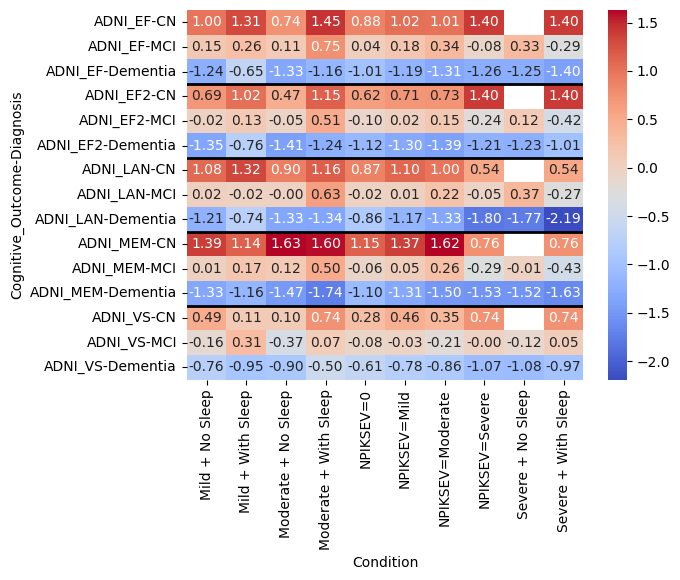

In [16]:
ax = sns.heatmap(final_summary, annot=True, fmt='.2f', cmap='coolwarm')

group_sizes = final_summary.index.get_level_values(
    'Cognitive_Outcome').value_counts(sort=False)
pos = 0
for size in group_sizes[:-1]:
    pos += size
    ax.axhline(pos, color='black', linewidth=2)

plt.show()